# Import the main libraries

In [24]:
#due to numerous deprecated function callings with Numpy 1.20
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
#due to numerous deprecated function callings with Numpy 1.20
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# initialization
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi

# importing Qiskit
from qiskit import *
from qiskit import IBMQ, Aer, BasicAer, execute
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex

#Build operator from unitary matrix
from qiskit.quantum_info.operators import Operator

# Basic vector

In [26]:
# all the basis vector of the Bloch sphere
vector0 = [1,0]
vector1 = [0,1]
vectorplus = [sqrt(2)/2,sqrt(2)/2]
vectorminus = [sqrt(2)/2,-sqrt(2)/2]
vectorplusj = [sqrt(2)/2+0.j,0.+1.j*sqrt(2)/2]
vectorminusj = [sqrt(2)/2+0.j,0.-1.j*sqrt(2)/2]

# Basic circuit

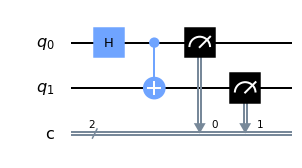

In [27]:
# draw the circuit for Phi+ Bell's state
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw("mpl")


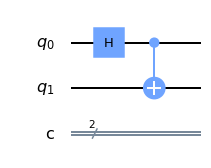

In [28]:
def phiplus(): 
    qc=QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    return qc
phiplus().draw("mpl")

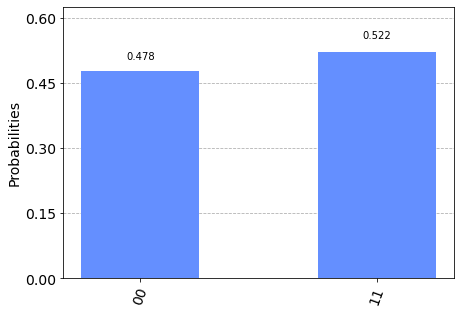

In [29]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(qc)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [30]:
# Let's see the result in a statevector

# draw the circuit for Phi+ Bell's state
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
#from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

# Build an operator

In [31]:
# Watch out, compare to wikipedia and other sources, q1_1 is the strongest bit so the unitary matrix is changed accordingly


controls = QuantumRegister(2)
circuit = QuantumCircuit(controls)

cx = Operator([
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]
])
circuit.unitary(cx, [0, 1], label='cx')
print(circuit)

       ┌─────┐
q35_0: ┤0    ├
       │  cx │
q35_1: ┤1    ├
       └─────┘


In [32]:
#only initialize one qubit
qc=QuantumCircuit(2)
qc.initialize(vector0, 0)
qc.initialize(vector0, 1)
qc.unitary(cx, [0, 1], label='cx')
print(qc)

     ┌─────────────────┐┌─────┐
q_0: ┤ initialize(1,0) ├┤0    ├
     ├─────────────────┤│  cx │
q_1: ┤ initialize(1,0) ├┤1    ├
     └─────────────────┘└─────┘


# Bloch sphere

/Users/alexandredelode/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:71: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


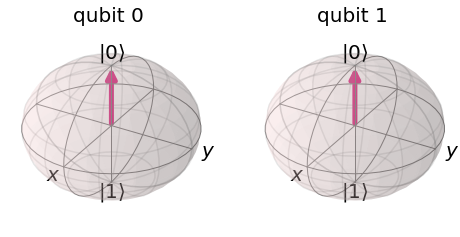

In [33]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

/Users/alexandredelode/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:71: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


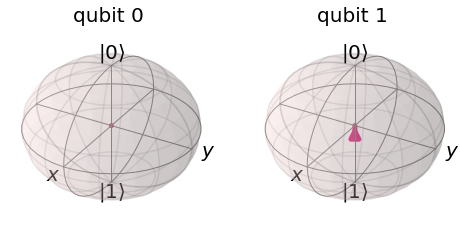

In [34]:
## if you mesure an entangled state, the bloch sphere has no sense

# draw the circuit for Phi+ Bell's state
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

# Basic Notes Quatum coding

### Teleportation

![Title](BOBgatetele.png)

### Quantum Fourier Transform

$ \omega_N^{jk} = e^{2\pi i \frac{jk}{N}} $

$ y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk} $

$ \vert x \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle $

$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert $


![Title](zbasis-counting.gif)

![Title](fourierbasis-counting.gif)

# Comparison recursive QFT vs unitary matrix construction

In [35]:
omega_8=1/sqrt(2)+1.j/sqrt(2)
line1=np.array([1,1,1,1,1,1,1,1])
line2=np.array([1,omega_8,omega_8**2, omega_8**3,omega_8**4,omega_8**5,omega_8**6,omega_8**7])
QFT8m=np.vstack((line1,line2,line2**2,line2**3,line2**4, line2**5,line2**6,line2**7))
QFT8m=QFT8m*1/sqrt(8)
QFT8mdag=np.transpose(np.conjugate(QFT8m))
#result=QFT8m.dot(QFT8mdag)
#result

In [36]:
#rewrite of qft recursively
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [37]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw()

┌───┐   
q_0: ──────────■──────────────────────────■─────┤ H ├─X─
               │                ┌───┐┌────┴────┐└───┘ │ 
q_1: ──────────┼──────────■─────┤ H ├┤ P(pi/2) ├──────┼─
     ┌───┐┌────┴────┐┌────┴────┐└───┘└─────────┘      │ 
q_2: ┤ H ├┤ P(pi/4) ├┤ P(pi/2) ├──────────────────────X─
     └───┘└─────────┘└─────────┘

In [38]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
unitary = result.get_unitary(qc, decimals=3)
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [39]:
test=np.round(unitary-QFT8m)
test
#unitary and QFT8m are the same matrices

array([[ 0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,
        -0.-0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.-0.j, -0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.+0.j, -0.-0.j,  0.-0.j,  0.+0.j, -0.+0.j,
        -0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j, -0.+0.j,  0.-0.j,  0.+0.j,
        -0.-0.j],
       [ 0.+0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,
        -0.+0.j],
       [ 0.+0.j, -0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.+0.j, -0.-0.j,
        -0.+0.j],
       [ 0.+0.j, -0.-0.j, -0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j, -0.+0.j,
         0.+0.j],
       [-0.+0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.+0.j, -0.+0.j,  0.+0.j,
         0.+0.j]])

In [40]:
QFT8 = Operator(QFT8m)
qc3=QuantumCircuit(3)
qc3.x(0)
qc3.x(2)
qc3.draw()
qc3.unitary(QFT8, [0, 1,2], label='QFT8')
print(qc3)

     ┌───┐┌───────┐
q_0: ┤ X ├┤0      ├
     └───┘│       │
q_1: ─────┤1 QFT8 ├
     ┌───┐│       │
q_2: ┤ X ├┤2      ├
     └───┘└───────┘


/Users/alexandredelode/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:71: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


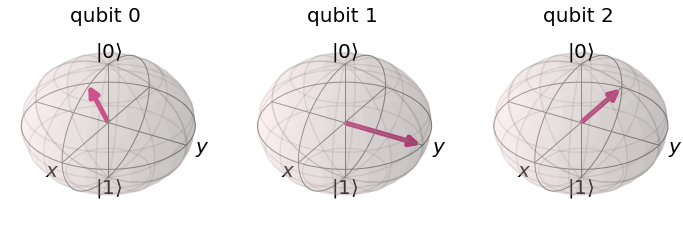

In [41]:
qobj = assemble(qc3)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [42]:
## even if the vectors don't seem to be on the equator, they are

# 101 : 5
# first qubit turned 5/8 * 2pi 
# second qubit turned 10/8 * 2pi = 1/4 turn
# third qubit turned 20/8 * 2pi = 1/2 turn

![Title](QFTPsi6.png)

![Title](QFTrightorder.png)

# About Cnot

It can be noted that in case of |-+> , it is the control and not the target that will change:

![Title](PhaseKickBack.png)

It can be also noted that the cnot inverse the position of the second and last element

![Title](CNOTswap.png)

# Basic Formula

Tensor product:

![Title](CollectiveState.png)

Phase Kickback Formulas:

$ |0 \oplus a \rangle - |1 \oplus a \rangle = (-1)^{a}(|0\rangle - |1\rangle) $


$ H(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}} (-1)^{a} |1\rangle ) = |a\rangle $

# Basic algo

# basic function

# GHZ game

The rules of the GHZ game (the three questions r, s and t and the answers a, b and c:

![Title](GHZtable.png)

In [43]:
GHZ_state = [
    1 / 2 * complex(1, 0),#000
    0,#001
    0,#010
    -1 / 2 * complex(1, 0),#011
    0,#100
    -1 / 2 * complex(1, 0),#101
    -1 / 2 * complex(1, 0),#110
    0]#111


q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.initialize(GHZ_state, [q[0],q[1],q[2]])
qc.draw()

┌─────────────────────────────────────────┐
q39_0: ┤0                                        ├
       │                                         │
q39_1: ┤1 initialize(0.5,0,0,-0.5,0,-0.5,-0.5,0) ├
       │                                         │
q39_2: ┤2                                        ├
       └─────────────────────────────────────────┘
 c1: 3/═══════════════════════════════════════════

In [44]:
#question (110) <=> Z-measurement for charlie,  X-measurements for alice and bob
qc.h(0)
qc.h(1)
qc.barrier()
qc.measure(0, 0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

┌─────────────────────────────────────────┐┌───┐ ░ ┌─┐      
q39_0: ┤0                                        ├┤ H ├─░─┤M├──────
       │                                         │├───┤ ░ └╥┘┌─┐   
q39_1: ┤1 initialize(0.5,0,0,-0.5,0,-0.5,-0.5,0) ├┤ H ├─░──╫─┤M├───
       │                                         │└───┘ ░  ║ └╥┘┌─┐
q39_2: ┤2                                        ├──────░──╫──╫─┤M├
       └─────────────────────────────────────────┘      ░  ║  ║ └╥┘
 c1: 3/════════════════════════════════════════════════════╩══╩══╩═
                                                           0  1  2

In [45]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
###it works !!! (only two zeros or no zeros) don't forget to ask the right question and to put a barrier 

{'111': 279, '001': 241, '100': 256, '010': 248}

# Use IBM computer

In [46]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [47]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
qobj = assemble(transpiled_bv_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

NameError: name 'bv_circuit' is not defined

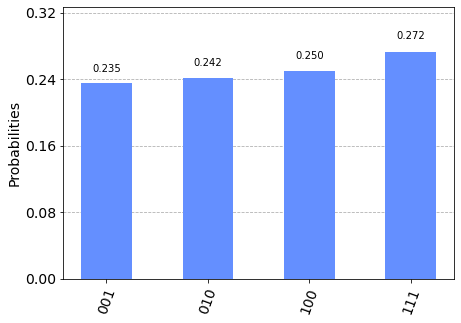

In [48]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)